In [1]:
from data_utils import *
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
dataset = Guided("data/guided5.csv", n_styles=5, seg_len=100, window=30, smooth_iterations=3, cutoff=20)

Loaded 2361 segments of style 0
Shape: (2361, 4, 100)
Loaded 1622 segments of style 1
Shape: (1622, 4, 100)
Loaded 2434 segments of style 2
Shape: (2434, 4, 100)
Loaded 1243 segments of style 3
Shape: (1243, 4, 100)
Loaded 981 segments of style 4
Shape: (981, 4, 100)


(200, 800)

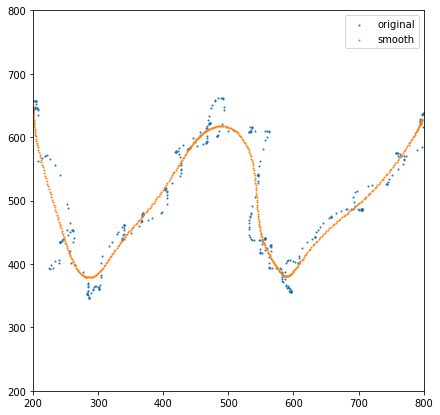

In [9]:
plt.figure(figsize=(7,7))
dataset.visualize_original(3,3)
plt.xlim((200, 800))
plt.ylim((200, 800))

Encoded style:  [1. 0. 0. 0. 0.]


(-200, 200)

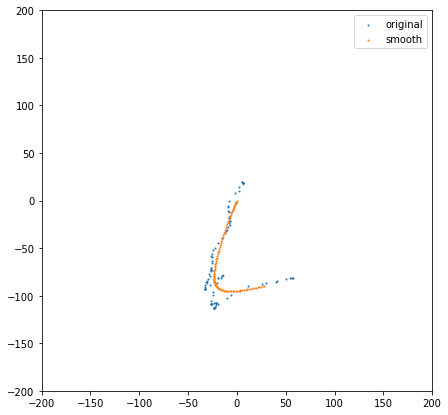

In [15]:
plt.figure(figsize=(7,7))
dataset.visualize(1200)
plt.xlim((-200, 200))
plt.ylim((-200, 200))

In [10]:
dataset = SmoothCurve("data/threecurves.csv")

Loaded 1715 segments of style 0
Shape: (1715, 4, 100)
Loaded 912 segments of style 1
Shape: (912, 4, 100)
Loaded 1469 segments of style 2
Shape: (1469, 4, 100)


Encoded style:  [1. 0. 0.]


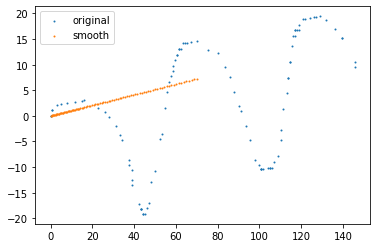

In [24]:
dataset.visualize(8)

Encoded style:  [1. 0. 0.]


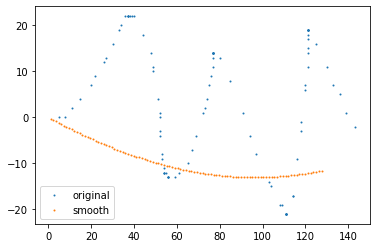

In [6]:
dataset.visualize(500)

In [5]:
with open("threecurves.csv") as f:
    # format:
    # id, style, pointx, pointy, controlx, controly
    f.readline() # discard first line
    while True:
        line = f.readline()
        if not line:
            break
        index, style, pointx, pointy, controlx, controly = line.split(",")
        style = int(style)

        pointx = np.array([float(i) for i in pointx.split(' ')], dtype=np.float32)
        pointy = np.array([float(i) for i in pointy.split(' ')], dtype=np.float32)
        controlx = np.array([float(i) for i in controlx.split(' ')], dtype=np.float32)
        controly = np.array([float(i) for i in controly.split(' ')], dtype=np.float32)
        assert len(pointx) == len(controly)
        assert len(pointy) == len(controlx)
        dx = pointx[1:] - pointx[:-1]
        dy = pointy[1:] - pointy[:-1]
        break

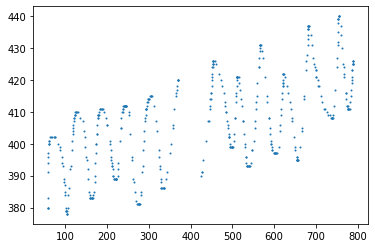

In [6]:
plt.scatter(pointx, pointy, s=1)

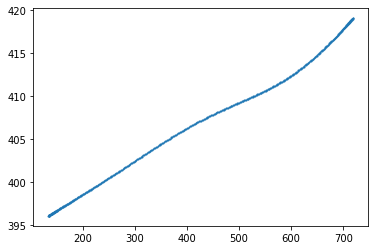

In [7]:
def kz2(series, window, iterations):
    z = pd.Series(series)
    for i in range(iterations):
        z = z.rolling(window, min_periods=1, center=True).mean()
    return z

w = 100
it = 5
new_x = kz2(pointx, w, it)
new_y = kz2(pointy, w, it)
plt.scatter(new_x, new_y, s=1)